1. 读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [ ]:
import pandas as pd
df = pd.read_csv('data/2023_6/open_rank_20236.csv')
#print(df.head())
max_value = df['value'].max()
min_value = df['value'].min()
mean_value = df['value'].mean()
median_value = df['value'].median()
print(f"最大值: {max_value}")
print(f"最小值: {min_value}")
print(f"均值: {mean_value}")
print(f"中位数: {median_value}")

                  item  rank    value  rankDelta  valueDelta
0  home-assistant/core     1  1394.45          0      -23.01
1     microsoft/vscode     2  1334.48          0      -36.42
2        NixOS/nixpkgs     3  1240.31          0       -0.31
3      flutter/flutter     4   886.61          0      -13.74
4      pytorch/pytorch     5   803.78          1        8.29
最大值: 1394.45
最小值: 200.68
均值: 346.9679
中位数: 273.66999999999996


2. 读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [10]:
import pandas as pd
df = pd.read_csv('data/2022/activity_2022.csv')
#print(df.head())
years = ['20221_value','20222_value','20223_value','20224_value', '20225_value', 
         '20226_value', '20227_value', '20228_value', '20229_value', '202210_value', 
         '202211_value', '202212_value']
average_growth_rates = []
for _, row in df.iterrows():
    growth_rates = []
    for i in range(1, len(years)):
        prev_value = row[years[i - 1]]
        current_value = row[years[i]]
        growth_rate = (current_value - prev_value) / prev_value * 100
        growth_rates.append(growth_rate)
    avg_growth_rate = sum(growth_rates) / len(growth_rates)
    average_growth_rates.append(avg_growth_rate)

df['avg_growth_rate'] = average_growth_rates
top_10_projects = df.sort_values(by='avg_growth_rate',ascending=False).head(10)
print(top_10_projects[['repo','avg_growth_rate']])

                                     repo  avg_growth_rate
4  firstcontributions/first-contributions        14.082374
7                        microsoft/vscode         2.290469
8                         pytorch/pytorch         1.316038
6                     home-assistant/core         0.845268
1                           NixOS/nixpkgs         0.029453
3                          elastic/kibana        -0.365071
9                          rust-lang/rust        -0.377805
5                         flutter/flutter        -1.240426
0                MicrosoftDocs/azure-docs        -1.792781
2                          dotnet/runtime        -2.284829


3. data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [3]:
import pandas as pd
china_df = pd.read_csv('data/2022/china_2022.csv')
global_df = pd.read_csv('data/2022/global_2022.csv')
#print(china_df.head())
#print(global_df.head())
# 计算各项指标的平均值
china_summary = china_df.mean(numeric_only=True)
global_summary = global_df.mean(numeric_only=True)
# 创建比较表格
comparison_df = pd.DataFrame({
    'Metric': china_summary.index,
    'China Average': china_summary.values,
    'Global Average': global_summary.values,
    'Difference (Global - China)': global_summary.values - china_summary.values
})

print("\nComparison of China and Global Data:")
print(comparison_df)


# 统计中位数
china_median = china_df.median(numeric_only=True)
global_median = global_df.median(numeric_only=True)

comparison_median_df = pd.DataFrame({
    'Metric': china_median.index,
    'China Median': china_median.values,
    'Global Median': global_median.values,
    'Difference (Global - China)': global_median.values - china_median.values
})

print("\nMedian Comparison of China and Global Data:")
print(comparison_median_df)


Comparison of China and Global Data:
           Metric  China Average  Global Average  Difference (Global - China)
0   issue_comment      61205.500      341409.400                   280203.900
1      open_issue       9169.200       43300.200                    34131.000
2       open_pull      16912.700       83423.000                    66510.300
3  review_comment      19857.500      120392.100                   100534.600
4     merged_pull      13764.100       62472.000                    48707.900
5            rank          5.500           5.500                        0.000
6           value      40269.534      215855.491                   175585.957
7       rankDelta          5.300           0.100                       -5.200
8      valueDelta       9265.007       11906.921                     2641.914

Median Comparison of China and Global Data:
           Metric  China Median  Global Median  Difference (Global - China)
0   issue_comment     39141.000     178629.000               

4. 贝叶斯定理

    贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

    根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

    非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

    工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

    已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

5. 接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

6. 根据以下数据建立可视化无向图

    user = [1, 2, 3, 4] 

    edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

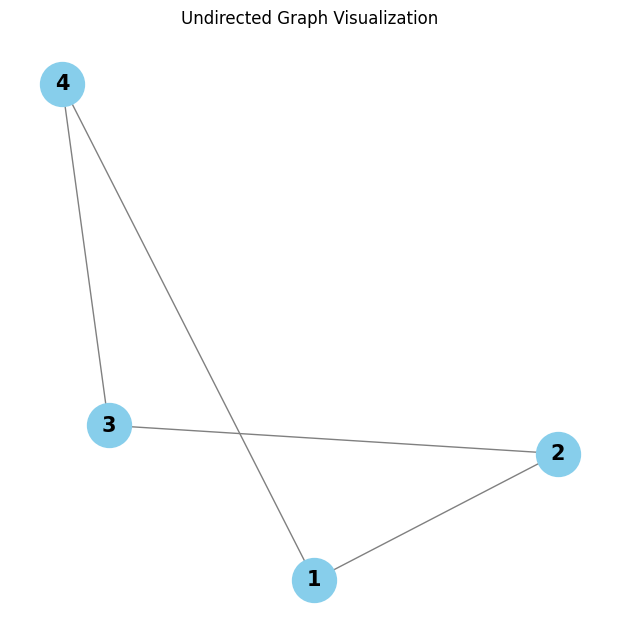

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# 定义节点和边
users = [1, 2, 3, 4]
edges = [(1, 2), (2, 3), (3, 4), (4, 1)]

# 创建无向图
G = nx.Graph()
G.add_nodes_from(users)
G.add_edges_from(edges)

# 绘制无向图
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color="skyblue", node_size=1000, font_size=15, font_weight="bold", edge_color="gray")
plt.title("Undirected Graph Visualization")
plt.show()


7. 根据以下数据建立可视化**有向图**

    users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

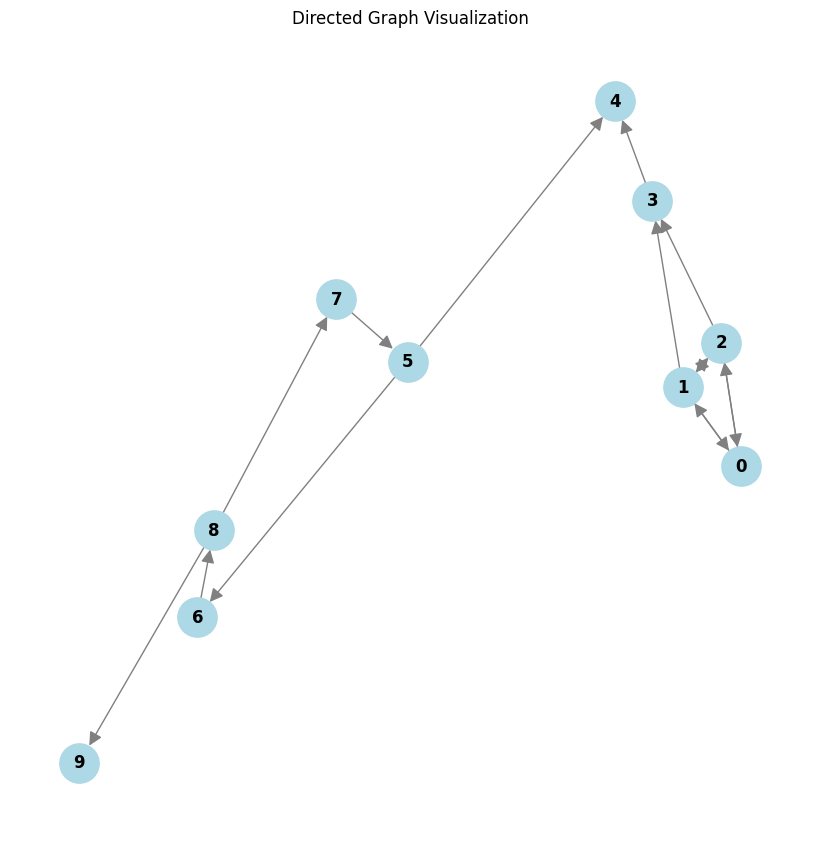

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# 定义节点和边
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
         (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
         (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

# 创建有向图
G = nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)

# 绘制有向图
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G)  # 选择图的布局
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=800, font_size=12, font_weight="bold", edge_color="gray", arrowsize=20)
plt.title("Directed Graph Visualization")
plt.show()


8. 针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。
    pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

PageRank values for each node:
Node 0: 0.0950
Node 1: 0.1055
Node 2: 0.1055
Node 3: 0.0950
Node 4: 0.1593
Node 5: 0.1020
Node 6: 0.0786
Node 7: 0.0786
Node 8: 0.1020
Node 9: 0.0786


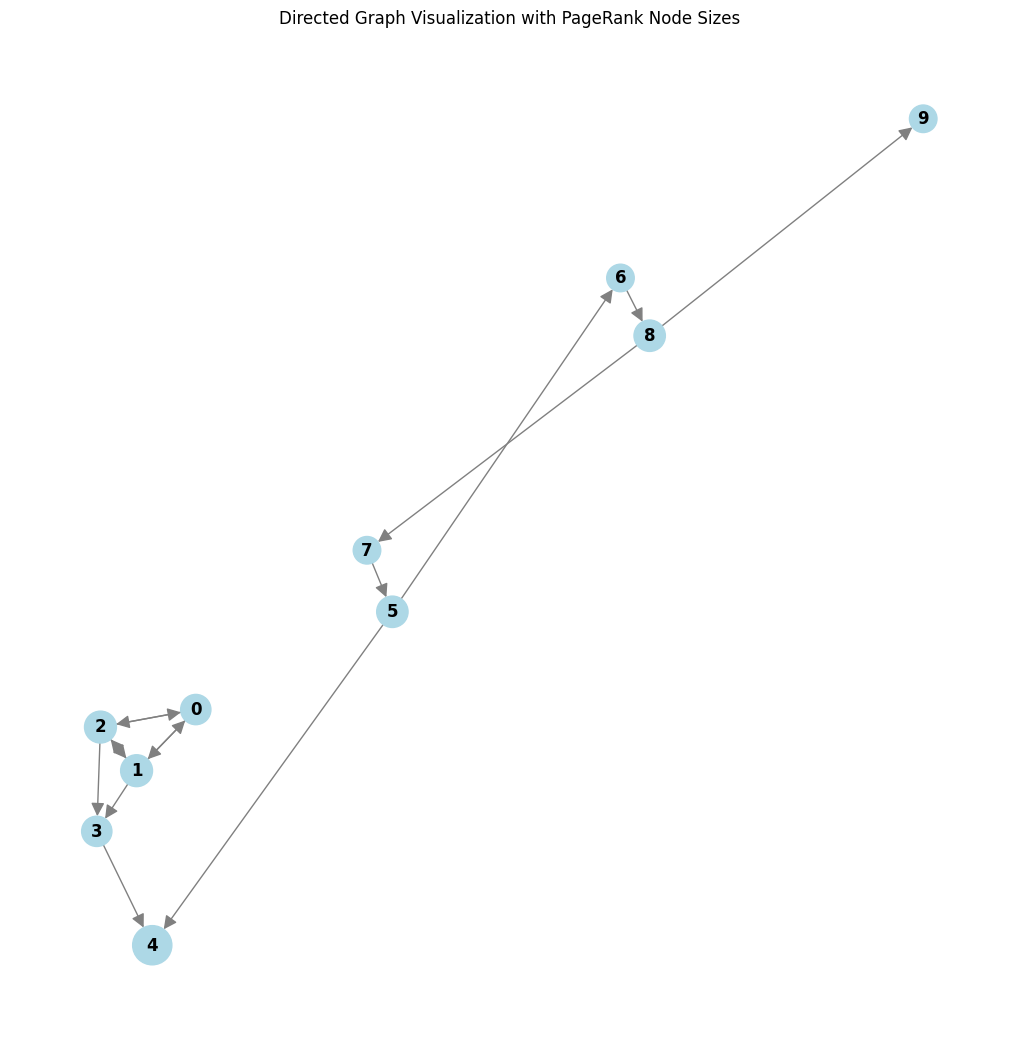

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# 定义节点和边
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
         (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
         (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

# 创建有向图
G = nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)

# 计算每个节点的 PageRank 值
pagerank_values = nx.pagerank(G)
print("PageRank values for each node:")
for node, value in pagerank_values.items():
    print(f"Node {node}: {value:.4f}")

# 根据 PageRank 值调整节点大小
node_sizes = [pagerank_values[node] * 5000 for node in G.nodes]

# 绘制有向图，节点大小根据 PageRank 调整
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  # 使用 spring 布局
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=node_sizes, font_size=12, font_weight="bold", edge_color="gray", arrowsize=20)
plt.title("Directed Graph Visualization with PageRank Node Sizes")
plt.show()
